In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create



In [2]:
# Read in the data
df = pd.read_csv(r"C:\Users\Guest_user\Downloads\movies.csv")

# Let's look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# looking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} -{}%'.format(col, round(pct_missing*100)))

name -0%
rating -1%
genre -0%
year -0%
released -0%
score -0%
votes -0%
director -0%
writer -0%
star -0%
country -0%
budget -28%
gross -2%
company -0%
runtime -0%


In [4]:
# Dropping null values
print("df shape before dropping rows", df.shape)
df.dropna(inplace = True)
print("df shape after dropping rows", df.shape)
df.info()

df shape before dropping rows (7668, 15)
df shape after dropping rows (5421, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [5]:
# looking at Data types for each columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Change data type of columns

df["budget"] = df["budget"].astype('int64')

df["gross"] = df["gross"].astype('int64')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
# Dropping any duplicates
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [11]:
# Analysis
# Checking for high correlations
# Is there a positive relationship between budget amount and gross revenue?

In [11]:
# Describing "budget" and "gross"
df[["budget", "gross"]].describe()

,budget,gross
count,5.421000e+03,5.421000e+03
mean,3.600917e+07,1.032297e+08
std,4.157337e+07,1.873027e+08
min,6.000000e+03,3.090000e+02
25%,1.000000e+07,1.073640e+07
50%,2.180000e+07,3.686941e+07
75%,4.500000e+07,1.124625e+08
max,3.560000e+08,2.847246e+09


Text(0.5, 1.0, 'Budget vs Gross Earnings')

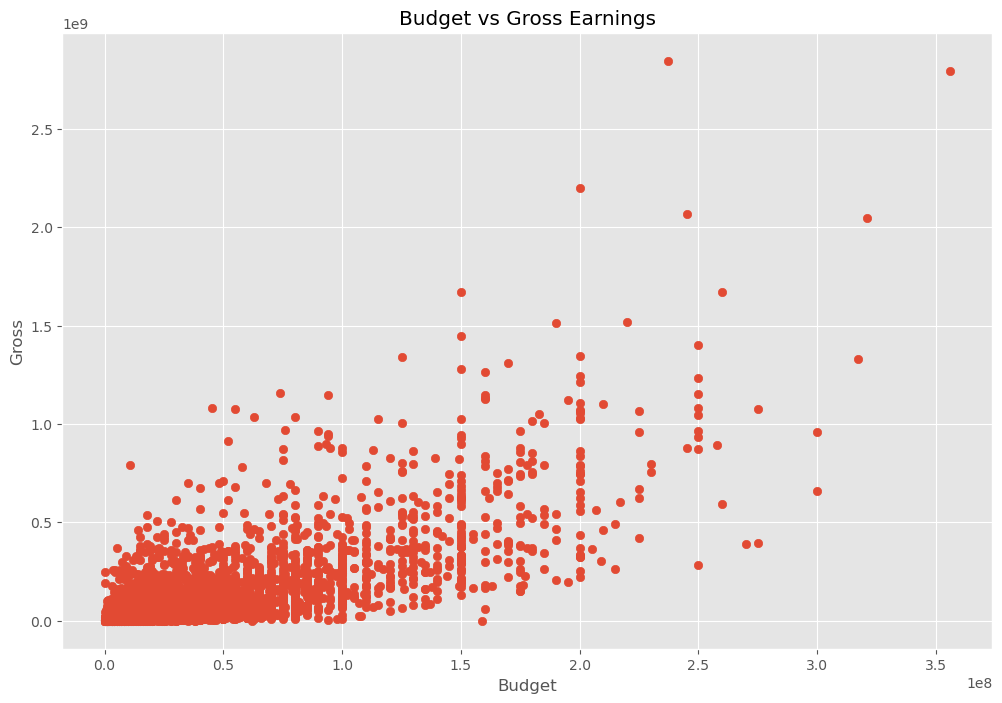

In [10]:
# Scatter plot with budget vs gross
plt.scatter(x=df["budget"], y=df["gross"])
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.title("Budget vs Gross Earnings")

<AxesSubplot:xlabel='budget', ylabel='gross'>

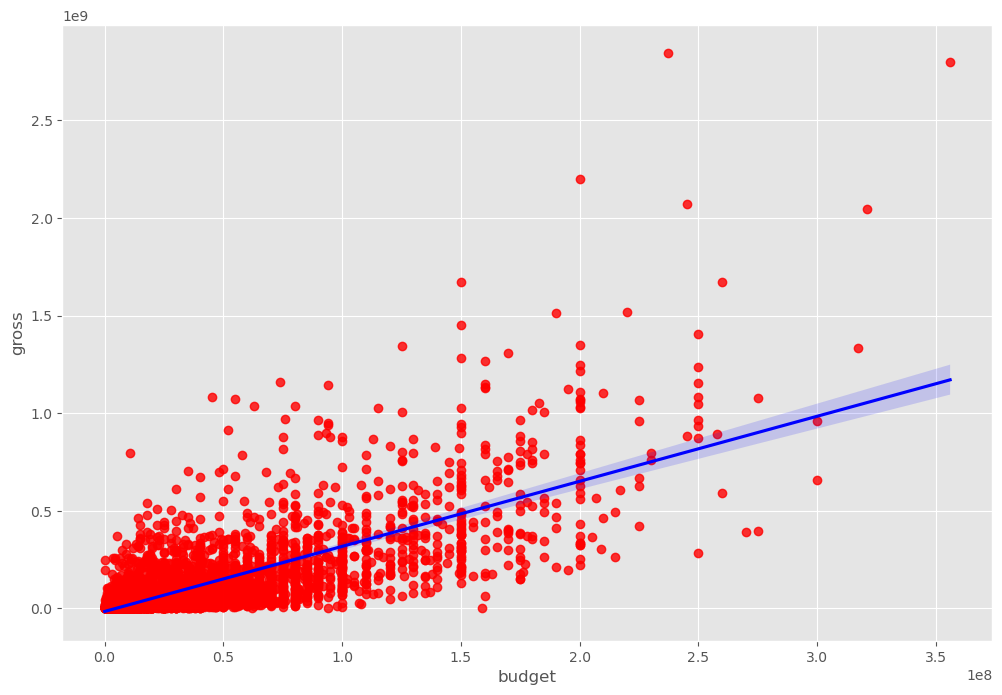

In [13]:
# plot budget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [14]:
#Let's start looking at correlations
df.corr() #pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [17]:
# It can be seen that there is a high correlation between budget and gross earnings

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

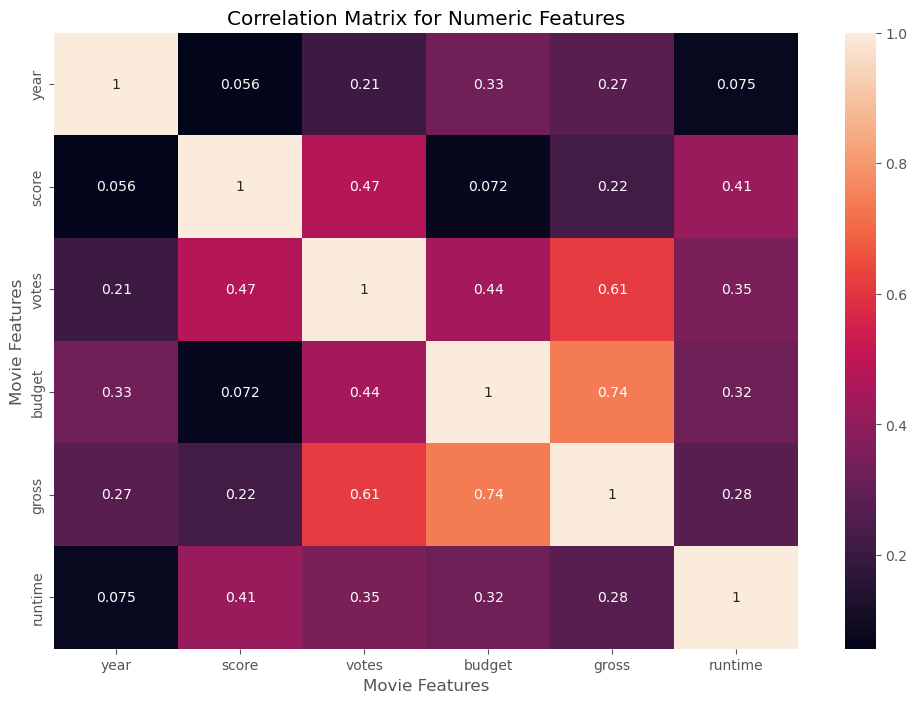

In [19]:
# Visualizing the correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.title("Correlation Matrix for Numeric Features")

In [ ]:
# Is there a corrlation between company and gross earnings?


In [20]:

df_numerized= df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]= df_numerized[col_name].astype("category")
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


In [21]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


Text(0.5, 1.0, 'Correlation Matrix for All Features')

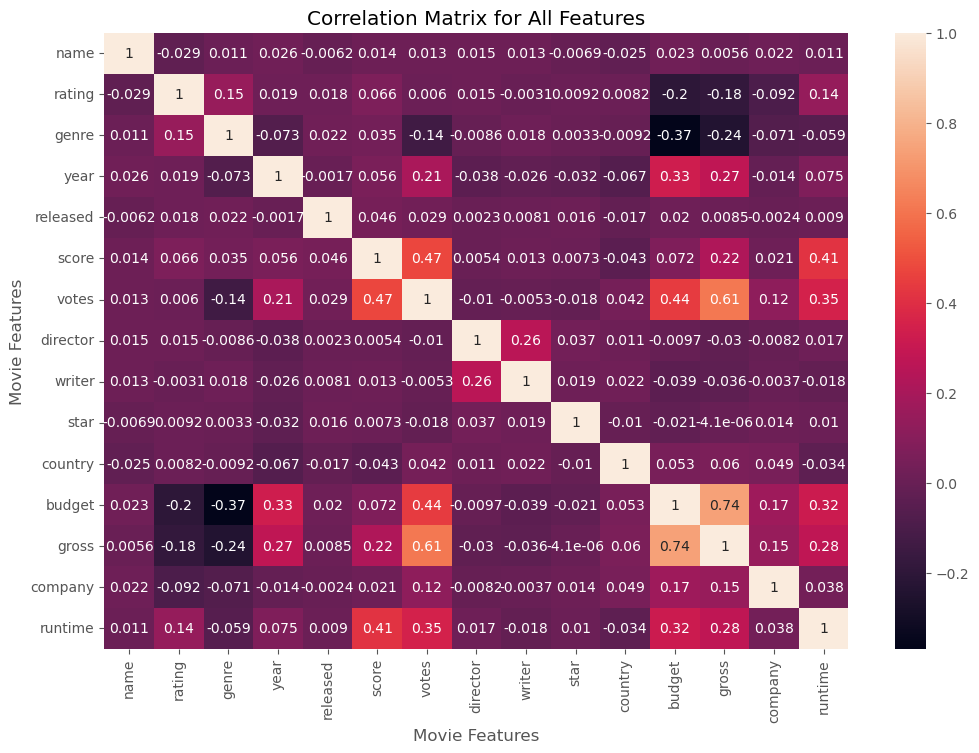

In [22]:
# Visualizing the correlations
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.title("Correlation Matrix for All Features")

In [24]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [27]:
high_corr = sorted_pairs[(sorted_pairs) >= 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# It is shown that votes and budget have the highest correlations to gross earnings
# Company has low correlation to gross earnings